In [1]:
%matplotlib inline

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
from IPython.display import clear_output
from scipy.stats import logistic
import tensorflow as tf

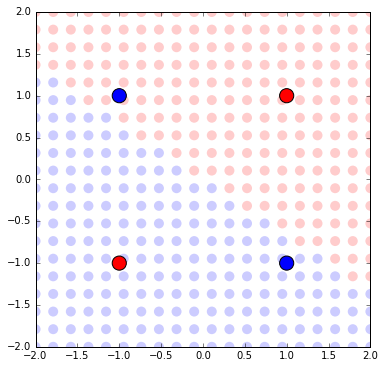

In [3]:
points = np.array([[1, 1, 1],
                   [-1, 1,  -1],
                   [-1, -1, 1],
                   [1, -1, -1]])

def f(x, W, b):
    return W.dot(x) + b

def vis(w1, w2, b):
    W = np.array([w1, w2])

    res = 20
    testps = []
    for x1 in np.linspace(-2, 2, res):
        for x2 in np.linspace(-2, 2, res):
            y = f(np.array([x1, x2]), W, b)
            testps.append([x1, x2, 'r' if y > 0 else 'b'])
            
            
    plt.figure(figsize=(6,6))
    plt.gca().set_aspect('equal')
    plt.axis([-2,2,-2,2])
            
    testps = np.array(testps)        
    plt.scatter(testps[:,0], testps[:,1], s=100, linewidths=0, c=testps[:,2], alpha=0.2)
    plt.scatter(points[:,0], points[:,1], s=200, c=['r' if p[2] == 1 else 'b' for p in points])
    
interact(vis, w1=(-3,3,.1), w2=(-3,3,.1),b=(-5,5,.25))

In [5]:
points = np.array([[1, 1, 1],
                   [-1, 1, -1],
                   [-1, -1, -1],
                   [1, -1, 1]])

# points = np.random.random_sample((8, 3)) * 2.0 - 1.0
# points[:,2] = [np.random.randint(2) * 2 - 1 for _ in range(points.shape[0])]

print(points)

w1 = 1.4
w2 = 0.1
b = 0.0

ALPHA = 0.5

for i in range(100):
    data = points[np.random.randint(len(points))]
    
    t = data[2]
    x = data[:2]
    
    W = np.array([w1, w2])
    
    z = W.dot(x) + b
    y = logistic.cdf(z)
    
    dcdy = (y - t)
    dydz = logistic._pdf(z)
    
    w1 -= dcdy * dydz * x[0] * ALPHA
    w2 -= dcdy * dydz * x[1] * ALPHA
    b -= dcdy * dydz * ALPHA
    
    clear_output(wait=True)
    vis(w1, w2, b)
    plt.show()

KeyboardInterrupt: 

In [17]:
IN = 2
HIDDEN = 20
OUT = 1

x = tf.placeholder(tf.float32)
t = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal((HIDDEN, IN)))
#b1 = tf.Variable(tf.random_normal((HIDDEN, 1)))
W2 = tf.Variable(tf.random_normal((OUT, HIDDEN)))

h = tf.sigmoid(tf.matmul(W1, x))
y = tf.matmul(W2, h)

cost = tf.reduce_mean(tf.square(y - t))

In [18]:
if 'session' in globals():
    session.close()
    
session = tf.InteractiveSession()
session.run(tf.initialize_all_variables())

In [19]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

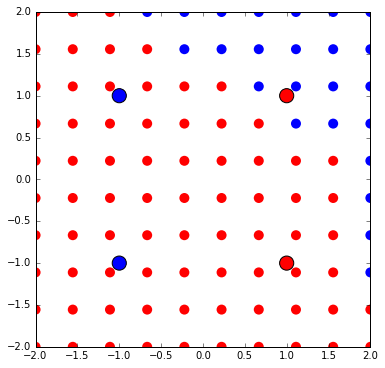

In [25]:
points = np.array([[1, 1, 1],
                   [-1, 1, -1],
                   [-1, -1, -1],
                   [1, -1, 1]])

for i in range(100):
    data = points[np.random.randint(len(points))]
    
    t_in = data[2]
    x_in = data[:2]
    
    clear_output(wait=True)
    
    es = []
    for xx in np.linspace(-2, 2, 10):
        for yy in np.linspace(-2, 2, 10):
            out = y.eval({x:[[xx], [yy]]})
            c = 'r' if out > 1 else 'b'
            es.append([xx, yy, c])
            
    es = np.array(es)
    
    plt.figure(figsize=(6, 6))
    plt.gca().set_aspect('equal')
    plt.axis([-2,2,-2,2])
    
    plt.scatter(es[:,0], es[:,1], c=es[:,2], linewidths=0.0, s=100)
    plt.scatter(points[:,0], points[:,1], s=200, c=['r' if p[2] == 1 else 'b' for p in points])
    
    plt.show()
    
    session.run(train, {x:[[xx], [yy]], t: [[t_in]]})